In [12]:
from pathlib import Path

import corr
import utils
import numpy as np
from PIL import Image

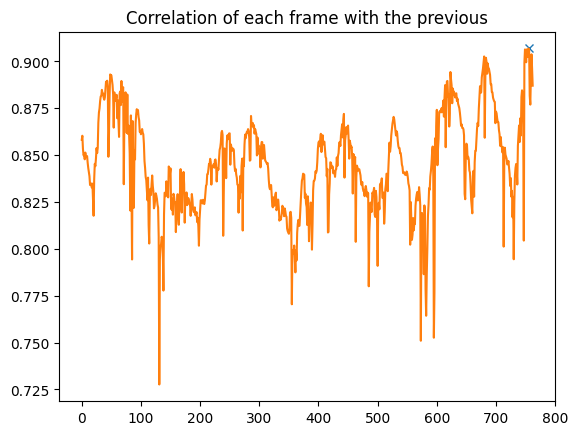

In [13]:
frames = utils.load_example_experiment()
template_idx = utils.find_highest_correlation(frames, plot=True)
template = frames[template_idx]

In [14]:
corrected = corr.ants_reg(frames, 0)

100%|██████████| 764/764 [16:26<00:00,  1.29s/it]


In [15]:
#ssims, gradient_ssims = utils.evaluate(corrected, template)

In [16]:
utils.save_results(corrected, utils.pth, "ants")

In [19]:
utils.save_and_display_video(np.array(corrected), fps=15)

Video saved to output.mp4


In [18]:
np.mean(ssims)

NameError: name 'ssims' is not defined

In [ ]:
np.mean(gradient_ssims)

Testing other experiments..

In [ ]:
pth = Path("../../data/low_movement/1czi")
pattern = r"1czi*.tif"
frame_paths = list(pth.glob(pattern))
if not frame_paths:
    error_msg = f"No files found matching {pattern=}"
    raise FileNotFoundError(error_msg)
frames = np.asarray([np.array(Image.open(path.as_posix())).astype(np.float32) for path in frame_paths])



In [ ]:
template_idx = utils.find_highest_correlation(frames, plot=True)